In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from scipy import stats
import astropy.units as u
import astropy.constants as c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from analysis.limits import get_limits

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
import matplotlib.ticker as mticker
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [2]:
def plot_limits(ax, channel, label=None, plot_sigma=True, **kwargs):
    mass_s, inj_s, sigma_s, limit_s = get_limits(channel)
    one_sigma = inj_s * sigma_s
    upper_limit = limit_s
    default_kwargs = dict(ls='-', color='k', marker='s', lw=1, ms=2)
    default_kwargs.update(kwargs)
    ax.plot(mass_s, upper_limit, label=label, **default_kwargs)
    if plot_sigma:
        ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
        ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

In [3]:
purple = np.array(mpl.colors.to_rgba("mediumpurple"))
blue = np.array(mpl.colors.to_rgba("cornflowerblue"))
green = np.array(mpl.colors.to_rgba("mediumseagreen"))
white = np.array([1, 1, 1, 1])
black = np.array([0, 0, 0, 1])
def ccmap_p(x):
    color1 = purple * 0.3 + black * 0.7
    color2 = purple * 0.7 + white * 0.3
    color = color1 * x + color2 * (1 - x)
    return tuple(color)
def ccmap_b(x):
    color1 = blue * 0.3 + black * 0.7
    color2 = blue * 0.7 + white * 0.3
    color = color1 * x + color2 * (1 - x)
    return tuple(color)
def ccmap_g(x):
    color1 = green * 0.3 + black * 0.7
    color2 = green * 0.7 + white * 0.3
    color = color1 * x + color2 * (1 - x)
    return tuple(color)

def show_cbar(cbar_func, n=100):
    vals = np.linspace(0, 1, n)
    colors = np.array([cbar_func(v) for v in vals]).reshape(1, n, -1)
    fig, ax = plt.subplots(figsize=(6, 1.0))
    ax.imshow(colors, aspect='auto', extent=[0, 1, 0, 0.2])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    plt.tight_layout()
    plt.show()

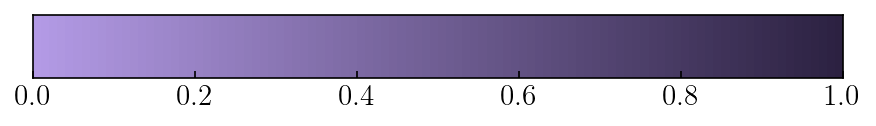

In [4]:
show_cbar(ccmap_p)

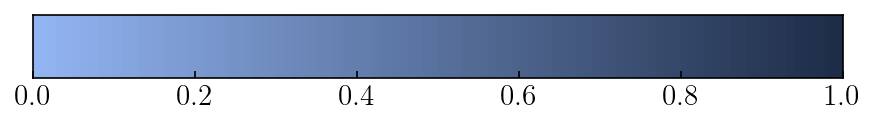

In [5]:
show_cbar(ccmap_b)

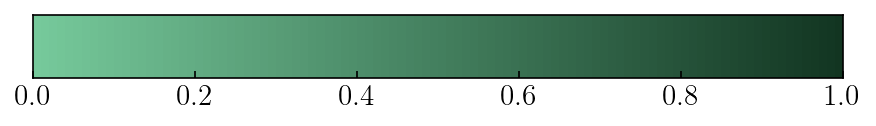

In [6]:
show_cbar(ccmap_g)

## 1. pbh-hr

In [33]:
plot_names = {
    'limits' : ['Voyager', 'Comptel', 'INTEGRAL_NEW', 'CMB', 'EGGR', 'BBN', '511keV-DeLaTorreLuque2024'],
    'edges_limits' : ['EDGESevap-Mittal2021', 'EDGESevap-Clark2018', 'EDGESevap-Saha2021'],
    'forecasts' : ['amego'],
    'extras' : ['EGRB', 'LeoTevap', '511keV', 'INTEGRAL', 'SuperK'],
}
plot_names_all = []
for t, fns in plot_names.items():
    plot_names_all += fns

data = {}
for plot_name in plot_names_all:
    m, f = np.loadtxt(f"{WDIR}/data/limits/pbh/{plot_name}.txt", unpack=True) # m is [Msun] or [g], [1]
    if plot_name in ['CMB', 'EGGR', 'GGR', 'BBN']:
        m_g = m # [g], [1]
    else:
        m_g = m * (c.M_sun.to(u.g)).value # [g], [1]
    data[plot_name] = dict(m=m_g, f=f)

In [47]:
colors = {
    'CMBevap' :      cms['binary'](0.75),
    'Voyager' :      ccmap_p(0.7),
    'INTEGRAL_NEW' : ccmap_p(0.4),
    'Comptel' :      ccmap_p(0.1),
    'amego' :        cms['Reds'](0.8),
    'CMB':           cms['binary'](0.75),
    'EGGR':          ccmap_b(0.4),
    'BBN':           cms['binary'](0.9),
    '511keV-DeLaTorreLuque2024': cms['binary'](0.2),
}
linestyles = {
    'EDGESevap-Clark2018' : '--',
    'EDGESevap-Mittal2021' : ':',
    'EDGESevap-Saha2021' : '-.',
}
labels = {
    'CMBevap' : 'Planck',
    'Voyager' : 'Voyager',
    'INTEGRAL_NEW' : 'Integral',
    'EGRB' : 'EGRB',
    'LeoTevap' : 'Leo T',
    'Comptel' : 'Comptel',
    'amego' : 'AMEGO (proj.)',
    'EDGESevap-Clark2018' : 'EDGES Clark 2018',
    'EDGESevap-Mittal2021' : 'EDGES Mittal 2021',
    'EDGESevap-Saha2021' : 'EDGES Saha 2021',
    'CMB': 'CMB',
    'EGGR': 'Extragal.\n' + r'$\gamma$-rays',
    'GGR': 'GGR',
    'BBN': 'BBN',
    '511keV-DeLaTorreLuque2024': '511 keV',
}
zorders = {
    'CMBevap' : -1,
    'Voyager' : -2,
    'INTEGRAL_NEW' : -2.5,
    'EGRB' : -3,
    'LeoTevap' : -4,
    'Comptel' : -5,
    'amego' : 10,
    'EDGESevap-Clark2018' : 6,
    'EDGESevap-Mittal2021' : 6,
    'EDGESevap-Saha2021' : 6,
    'CMB': 0,
    'EGGR': -10,
    'GGR': 0,
    'BBN': 0,
    '511keV-DeLaTorreLuque2024': -15,
}

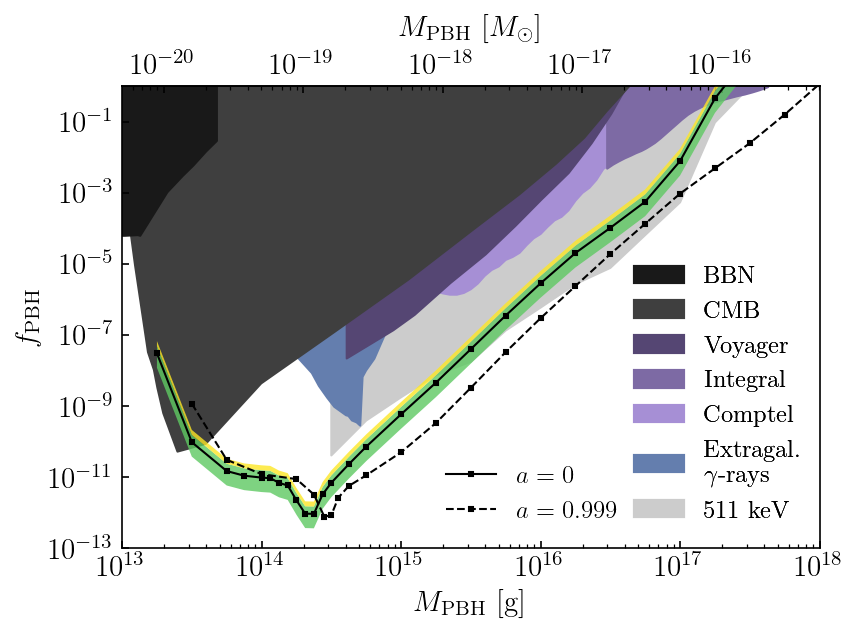

In [49]:
extras = False
edges = False
forecast = False

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_limits(ax, 'pbhhr-a0.000-250909', label=r'$a=0$')
plot_limits(ax, 'pbhhr-a0.999-250909', marker='s', plot_sigma=False, label=r'$a=0.999$', ls='--')

# existing limits
f_max = 1e10
ims = []
for n in plot_names['limits']:
    ims.append(ax.fill_between(data[n]['m'], data[n]['f'], f_max, label=labels[n], color=colors[n], zorder=zorders[n]))
if edges:
    for n in plot_names['edges_limits']:
        ims.append(ax.plot(data[n]['m'], data[n]['f'], lw=1, linestyle=linestyles[n], label=labels[n], color=cms['binary'](0.7), zorder=zorders[n]))
if forecast:
    for n in plot_names['forecasts']:
        ims.append(ax.plot(data[n]['m'], data[n]['f'], lw=1, label=labels[n], ls='--', color=colors[n], zorder=zorders[n]))
if extras:
    for n in plot_names['extras']:
        ims.append(ax.plot(data[n]['m'], data[n]['f'], lw=1, label=n, zorder=10))

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [g]', ylabel=r'$f_\mathrm{PBH}$')
ax.set(ylim=(1e-13, 1e0), xlim=(1e13, 1e18))

handles, handle_labels = plt.gca().get_legend_handles_labels()
if edges:
    order = [2, 0, 3, 1, 4, 5, 6, 7]
    ax.legend([handles[idx] for idx in order], [handle_labels[idx] for idx in order], loc='lower right', frameon=False, fontsize=10)
else:
    i1_s = [0, 1]
    i2_s = [7, 5, 2, 4, 3, 6, 8]
    hl1 = [handles[i] for i in i1_s], [handle_labels[i] for i in i1_s]
    hl2 = [handles[i] for i in i2_s], [handle_labels[i] for i in i2_s]
    # hl3 = [handles[i] for i in i3_s], [handle_labels[i] for i in i3_s]
    ax.add_artist(ax.legend(*hl1, loc=(0.45, 0.035), frameon=False))
    ax.add_artist(ax.legend(*hl2, loc=(0.72, 0.035), frameon=False))
    # ax.add_artist(ax.legend(*hl3, loc=(0.7, 0.1), frameon=False))

grams_to_solmass = lambda x: (x * u.g).to(u.solMass).value
solmass_to_grams = lambda x: (x * u.solMass).to(u.g).value
ax2 = ax.secondary_xaxis(location='top', functions=(grams_to_solmass, solmass_to_grams))
ax2.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]', labelpad=8)

fig.savefig('paper2/pbhhr-limits.pdf', bbox_inches='tight')

## 1.1 Age estimate

In [8]:
from astropy.cosmology import Planck18 as cosmo
from scipy.optimize import minimize_scalar

from dm21cm.precompute.pbh_hr.read import read_pbh

def t_to_z(t):
    return minimize_scalar(lambda z: np.abs(cosmo.age(z=z).to('s').value - t), bounds=(5, 50), method='bounded').x

In [18]:
! ls /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/blackhawk/a0.000

m13.2500_pri  m14.1250_pri  m14.5000_pri  m15.7500_pri	m17.2500_pri
m13.5000_pri  m14.1875_pri  m14.6250_pri  m16.0000_pri	m17.5000_pri
m13.7500_pri  m14.2500_pri  m14.7500_pri  m16.2500_pri	m17.7500_pri
m13.8750_pri  m14.3125_pri  m15.0000_pri  m16.5000_pri	m18.0000_pri
m14.0000_pri  m14.3750_pri  m15.2500_pri  m16.7500_pri
m14.0625_pri  m14.4375_pri  m15.5000_pri  m17.0000_pri


In [15]:
results_dir = '/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/blackhawk/a0.000/m14.5000_pri'
data = read_pbh(results_dir, 'evolution')
t = data['t'][-1]
print(t, t_to_z(t))

results_dir = '/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/blackhawk/a0.999/m14.5000_pri'
data = read_pbh(results_dir, 'evolution')
t = data['t'][-1]
print(t, t_to_z(t))

2.51738e+16 6.749893069448711
9612120000000000.0 13.706396115492883


In [ ]:
results_dir = '/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/blackhawk/a0.000/m14.3125_pri'
data = read_pbh(results_dir, 'evolution')
t_1 = data['t'][-1]

results_dir = '/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/blackhawk/a0.000/m14.3750_pri'
data = read_pbh(results_dir, 'evolution')
t_2 = data['t'][-1]

print(t_1, t_2)

6572300000000000.0 1.02896e+16


In [ ]:
results_dir = '/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/blackhawk/a0.999/m14.4500_pri'
data = read_pbh(results_dir, 'evolution')
t_1 = data['t'][-1]

results_dir = '/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/blackhawk/a0.999/m14.5000_pri'
data = read_pbh(results_dir, 'evolution')
t_2 = data['t'][-1]

print(t_1, t_2)

6810660000000000.0 9612120000000000.0


In [ ]:

print(t_to_z(t_1), t_to_z(t_2), t_to_z((t_1 + t_2) / 2))

17.929957173867432 13.055634393140124 15.04483170800098


## 2. pwave

In [10]:
LeoT_color = cms['binary'](0.7)
NuSTAR_color = ccmap_g(0.6)

CMBcosmo_color = cms['binary'](0.8)
VoyagerAMS_color = cms['binary'](0.6)
xrays_color = ccmap_p(0.7)
Integral511keV_color = ccmap_p(0.1)

cluster_color = ccmap_b(0.7)
Fermi_color = ccmap_b(0.2)


def plot_ee_LeoT(ax, **kwargs):
    m, C = np.loadtxt(f"{WDIR}/data/limits/pwave/ee-LeoT.txt", unpack=True) # m is [eV], sigmav is [cm^3/s]
    m_plot = m
    vref = 220 * u.km / u.s
    C_plot = C * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label='Leo T', fc=LeoT_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_phph_LeoT(ax, **kwargs):
    m, Cswave = np.loadtxt(f"{WDIR}/data/limits/pwave/phph-LeoT.txt", unpack=True) # m is [eV], sigmav is [cm^3/s]
    m_plot = m
    vref = 7 * np.sqrt(6) * u.km / u.s
    C_plot = Cswave * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label='Leo T', fc=LeoT_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_fake_LeoT(ax, **kwargs):
    default_kwargs = dict(label='Leo T', fc=LeoT_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between([-2, -1], [2, 2], 1, **default_kwargs)

def plot_ee_CMBcosmo(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/ee-CMBcosmo.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
    vref = 100 * u.km / u.s
    m_plot = m * 1e9 # [GeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'CMB\,+\,cosmology', fc=CMBcosmo_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_ee_511keV(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/ee-511keV.txt", unpack=True) # m is [MeV], sigmav is [cm^3/s]
    vref = 220 * u.km / u.s
    m_plot = m * 1e6 # [MeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'511 keV', fc=Integral511keV_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

# def plot_ee_eROSITA(ax, **kwargs):
#     m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/ee-eROSITA.txt", unpack=True) # m is [MeV], sigmav is [cm^3/s]
#     vref = 220 * u.km / u.s
#     m_plot = m * 1e6 # [MeV] -> [eV]
#     C_plot = sigmav * (c.c / vref).to(1).value ** 2
#     default_kwargs = dict(label=r'eROSITA', fc=eROSITA_color, ec='none', zorder=-10)
#     default_kwargs.update(kwargs)
#     ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_ee_VoyagerAMS(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/ee-VoyagerAMS.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
    vref = c.c
    m_plot = m * 1e9 # [GeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'Voyager\,+\,AMS-02', fc=VoyagerAMS_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_ee_xrays(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/ee-xrays.txt", unpack=True) # m is [MeV], sigmav is [cm^3/s]
    vref = 220 * u.km / u.s
    m_plot = m * 1e6 # [MeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'$X$-rays (combined)', fc=xrays_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_phph_NuSTAR(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/phph-NuSTAR.txt", unpack=True) # m is [keV], sigmav is [cm^3/s]
    vref = 220 * u.km / u.s
    m_plot = m * 1e3 # [keV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'NuSTAR', fc=NuSTAR_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_tautau_CMBcosmo(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/tautau-CMBcosmo.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
    vref = 100 * u.km / u.s
    m_plot = m * 1e9 # [GeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'CMB\,+\,cosmology', fc=CMBcosmo_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_tautau_Fermi(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/tautau-Fermi.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
    vref = 220 * u.km / u.s
    m_plot = m * 1e9 # [GeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'Fermi', fc=Fermi_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_tautau_VoyagerAMS(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/tautau-VoyagerAMS.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
    vref = c.c
    m_plot = m * 1e9 # [GeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2
    default_kwargs = dict(label=r'Voyager\,+\,AMS-02', fc=VoyagerAMS_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_tautau_clusters(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/tautau-clusters.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
    vref = 1000 * u.km / u.s
    m_plot = m * 1e9 # [GeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2 * 1000 # remove boost factor of 1000
    default_kwargs = dict(label=r'Clusters', fc=cluster_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_tautau_clusters17(ax, **kwargs):
    m, sigmav = np.loadtxt(f"{WDIR}/data/limits/pwave/tautau-clusters17.txt", unpack=True) # m is [GeV], sigmav is [cm^3/s]
    vref = 1000 * u.km / u.s
    m_plot = m * 1e9 # [GeV] -> [eV]
    C_plot = sigmav * (c.c / vref).to(1).value ** 2 * 5 # remove boost factor of 5
    default_kwargs = dict(label=r'Clusters', fc=cluster_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between(m_plot, C_plot, 1, **default_kwargs)

def plot_fake_Fermi(ax, **kwargs):
    default_kwargs = dict(label='Fermi (MW halo)', fc=Fermi_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between([-2, -1], [2, 2], 1, **default_kwargs)

def plot_fake_cluster(ax, **kwargs):
    default_kwargs = dict(label='Fermi (clusters)', fc=cluster_color, ec='none', zorder=-10)
    default_kwargs.update(kwargs)
    ax.fill_between([-2, -1], [2, 2], 1, **default_kwargs)

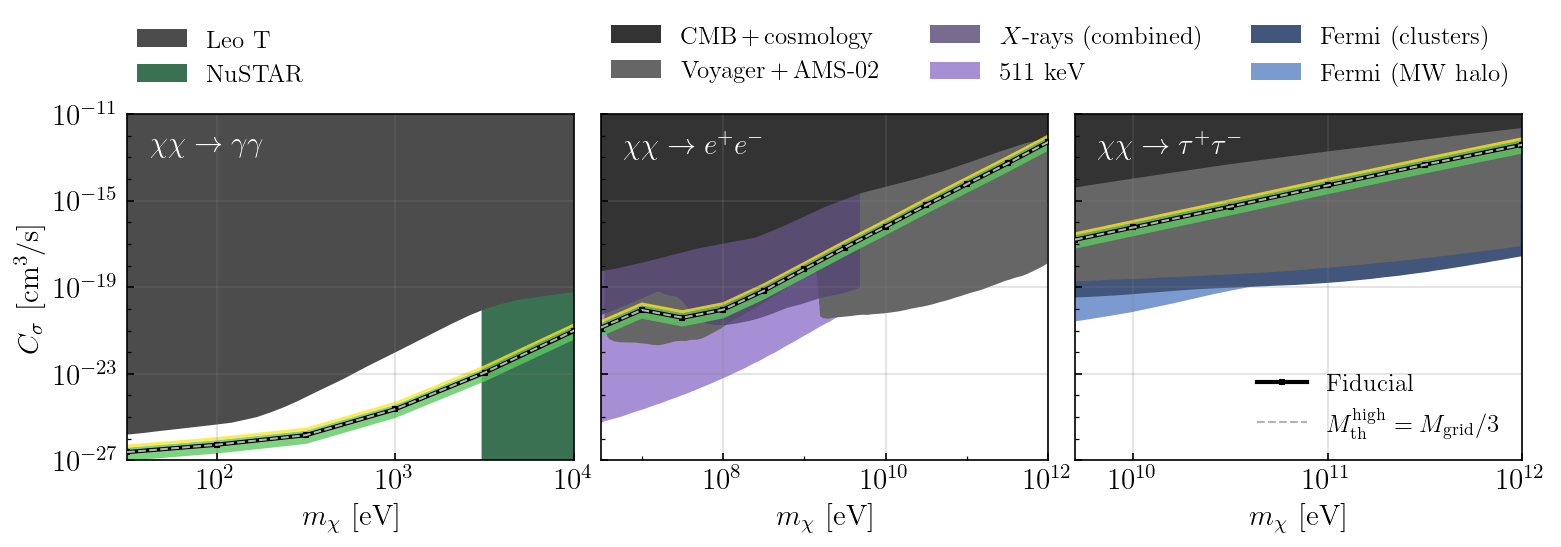

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

limit_tags = ['pwave-phot-250909', 'pwave-elec-250909', 'pwave-tau-250909']
cmp_limit_tags = ['pwave-phot-mc1e11-250909', 'pwave-elec-mc1e11-250909', 'pwave-tau-mc1e11-250909']
texts = [r'$\chi\chi\rightarrow ' + s + '$' for s in [r'\gamma\gamma', r'e^+e^-', r'\tau^+\tau^-']]
text_colors = ['w', 'w', 'w']
xlims = [[3.162277660168379612e+01, 1e4], [3.162277660168379545e+06, 1e12], [5.011872336272714615e+09, 1e12]]

line_legend_i = 2
for i, ax in enumerate(axs):
    plot_limits(ax, limit_tags[i], lw=2, label=('Fiducial' if i == line_legend_i else None))
    plot_limits(ax, cmp_limit_tags[i], plot_sigma=False, color=cms['binary'](0.3), ls='--', marker='', zorder=10,
                label=(r'$M_\mathrm{th}^\mathrm{high}=M_\mathrm{grid}/3$' if i == line_legend_i else None))
    ax.set(xscale='log', yscale='log')
    ax.set(xlabel=r'$m_\chi$ [eV]', xlim=xlims[i])
    ax.text(0.05, 0.95, texts[i], transform=ax.transAxes, fontsize=14, ha='left', va='top', color=text_colors[i])
    ax.grid(color='0.5', alpha=0.2, linewidth=1, linestyle='-', zorder=-20)

plot_phph_LeoT(axs[0], zorder=0)
plot_phph_NuSTAR(axs[0], zorder=-1)


plot_ee_CMBcosmo(axs[1], zorder=0)
plot_ee_xrays(axs[1], zorder=-2, alpha=0.8)
plot_ee_VoyagerAMS(axs[1], zorder=-3)
plot_ee_511keV(axs[1], zorder=-4)
plot_fake_Fermi(axs[1])
plot_fake_cluster(axs[1])


plot_tautau_CMBcosmo(axs[2], zorder=0, label='')
plot_tautau_VoyagerAMS(axs[2], zorder=-1, label='')
plot_tautau_clusters17(axs[2], zorder=-2, label='')
plot_tautau_Fermi(axs[2], zorder=-3, label='')


axs[0].legend(frameon=False, loc=(0., 1.05))
# axs[1].legend(frameon=False, loc=(0., 1.05), ncol=3)
handles, handle_labels = axs[1].get_legend_handles_labels()
order = [0, 2, 1, 3, 5, 4]
axs[1].legend([handles[idx] for idx in order],
          [handle_labels[idx] for idx in order],
          loc=(0., 1.05), ncol=3, frameon=False)
axs[2].legend(frameon=False, loc='lower right')


axs[0].set(ylim=(1e-27, 1e-11))
axs[0].set(ylabel=r'$C_\sigma$ [cm$^3$/s]')

axs[0].xaxis.set_minor_locator(plt.NullLocator())
axs[2].xaxis.set_minor_locator(plt.NullLocator())
axs[0].set_yticks(np.logspace(-27, -11, 17), minor = True)
axs[0].set_yticklabels([], minor = True)
axs[1].set_xticks(np.logspace(7, 11, 5), minor = True)
axs[1].set_xticklabels([], minor = True)

fig.subplots_adjust(wspace=0.06)
fig.savefig('paper2/pwave-limits.pdf', bbox_inches='tight')

## 3. pbh-acc test view

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs
plot_limits(ax, 'pbhacc-PRc23-250630', label=r'PR $c_\mathrm{in}=23~$km/s')
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [$M_\odot$]', ylabel=r'$f_\mathrm{PBH}$')
ax.grid(color='0.5', alpha=0.2, linewidth=1, linestyle='-')
ax.legend(frameon=False)

# fig.savefig('paper2/pbhacc-limits.pdf', bbox_inches='tight')

In [7]:
def plot_limits_simple(ax, channel, label=None, **kwargs):
    mass_s, inj_s, sigma_s, limit_s = get_limits(channel)
    one_sigma = inj_s * sigma_s
    upper_limit = limit_s
    default_kwargs = dict(ls='-', lw=1, ms=2)
    default_kwargs.update(kwargs)
    ax.plot(mass_s, upper_limit, label=label, **default_kwargs)
    # ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
    # ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

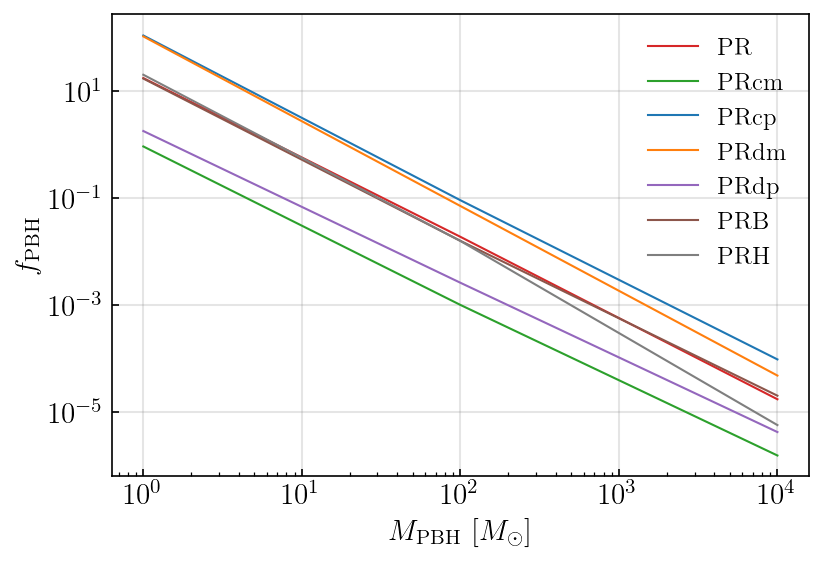

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs
plot_limits_simple(ax, 'pbhacc-PRc23-250630', label=r'PR')
plot_limits_simple(ax, 'pbhacc-PRc14-250630', label=r'PRcm')
plot_limits_simple(ax, 'pbhacc-PRc29-250630', label=r'PRcp')
plot_limits_simple(ax, 'pbhacc-PRc23dm-250630', label=r'PRdm')
plot_limits_simple(ax, 'pbhacc-PRc23dp-250630', label=r'PRdp')
plot_limits_simple(ax, 'pbhacc-PRc23B-250630', label=r'PRB')
plot_limits_simple(ax, 'pbhacc-PRc23H-250630', label=r'PRH')

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [$M_\odot$]', ylabel=r'$f_\mathrm{PBH}$')
ax.grid(color='0.5', alpha=0.2, linewidth=1, linestyle='-')
ax.legend(frameon=False)

# fig.savefig('paper2/pbhacc-limits.pdf', bbox_inches='tight')